In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
#!pip install yfinance
import yfinance as yf # https://pypi.org/project/yfinance/
import math
import random
import seaborn as sns
import datetime
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore')

In [12]:
def calculate_week_number(df_data):
    start_weekday = df_data.index[0].weekday()
    start_date = df_data.index[0]
    week_nums = []
    i = 0
    while i<len(df_data.index):
        cur_date = df_data.index[i]
        cur_week_num = ( int((cur_date- start_date).days) + start_weekday ) // 7
        week_nums.append( cur_week_num )
        i += 1
    df_data['week_num'] = week_nums
    return df_data


# get data by ticker-name, start-time & end-time
def get_df_data(ticker_name="AAPL", start_time="2022-01-01", end_time="2022-10-09"):
    df_data = yf.download(tickers=ticker_name, start=start_time, end=end_time) 
    df_data = df_data[ ["Open", "High", "Low", "Close", "Volume"] ]
    df_data['Volume_log'] = np.log2(df_data['Volume'])
    df_data['previous_Close'] = df_data['Close'].shift(1)
    df_data['daily_return'] = (df_data['Close']-df_data['previous_Close'])/df_data['previous_Close']
    df_data['overnight_return'] = (df_data['Open']-df_data['previous_Close'])/df_data['previous_Close']
    MA1, MA2 = 5, 20
    df_data['MA1'] = df_data['Close'].rolling(MA1).mean()
    df_data['MA2'] = df_data['Close'].rolling(MA2).mean()
    df_data['weekday'] = df_data.index.weekday
    df_data = calculate_week_number(df_data)
    return df_data

def weekly_return1(df_data, wn):
    week_df = df_data[ df_data['week_num']==wn ]
    week_open = week_df['Open'][0]
    week_close = week_df['Close'][-1]
    r = (week_close-week_open)/week_open * 100
    #print( week_open, week_close, r )
    return round(r, 2)

def weekly_return2(df_data, wn):
    prev_week_df = df_data[ df_data['week_num']==wn-1 ]
    cur_week_df = df_data[ df_data['week_num']==wn ]
    prev_week_close = prev_week_df['Close'][-1]
    cur_week_close = cur_week_df['Close'][-1]
    r = (cur_week_close-prev_week_close)/prev_week_close * 100
    #print( prev_week_close, cur_week_close, r )
    return round(r, 2)

def addlabels(x_list, y_list, x_offset=0.5, y_offset=3):
    for i in range(len(x_list)):
        v = y_list[i]
        if v>0:
            plt.text(x_list[i]+x_offset,y_list[i]+y_offset,v)
        else:
            plt.text(x_list[i]+x_offset,y_list[i]-y_offset,v)
    return 

[*********************100%***********************]  1 of 1 completed


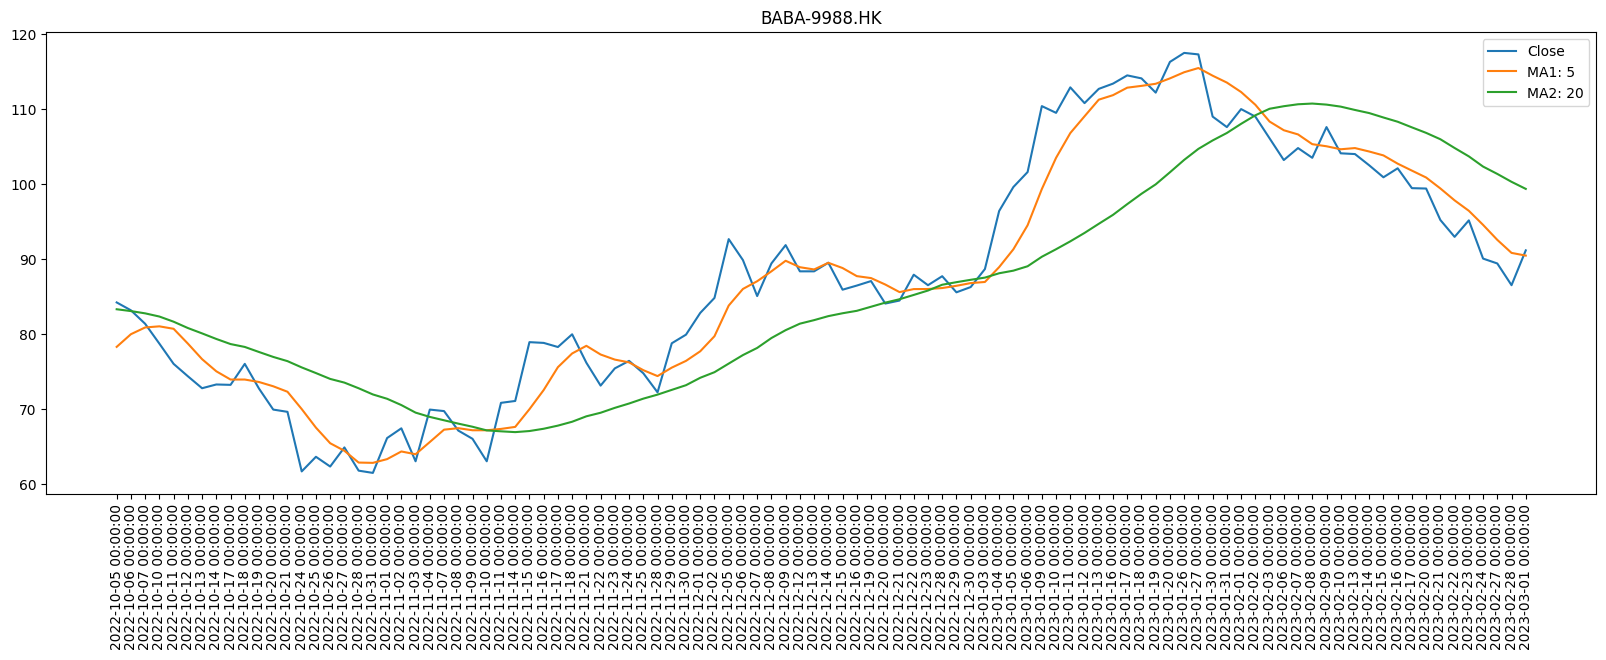

[*********************100%***********************]  1 of 1 completed


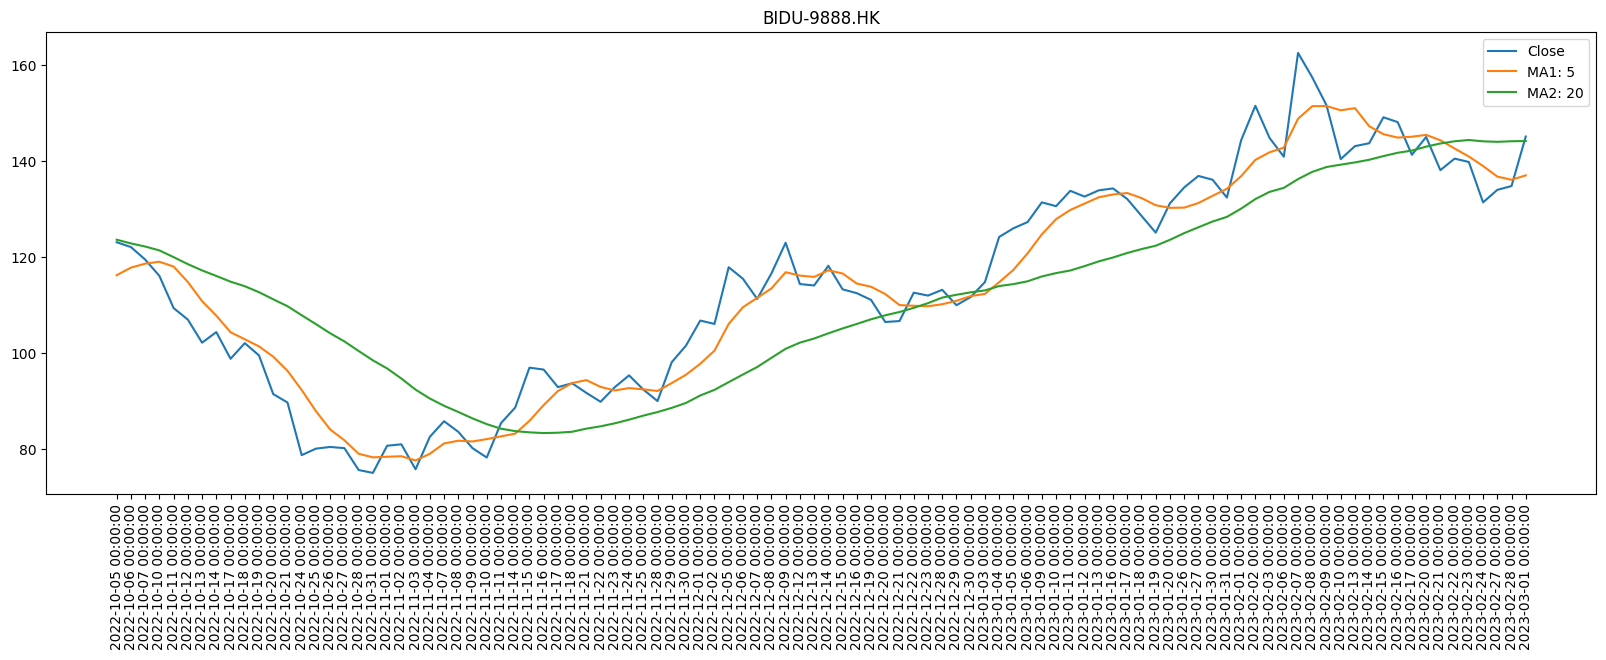

[*********************100%***********************]  1 of 1 completed


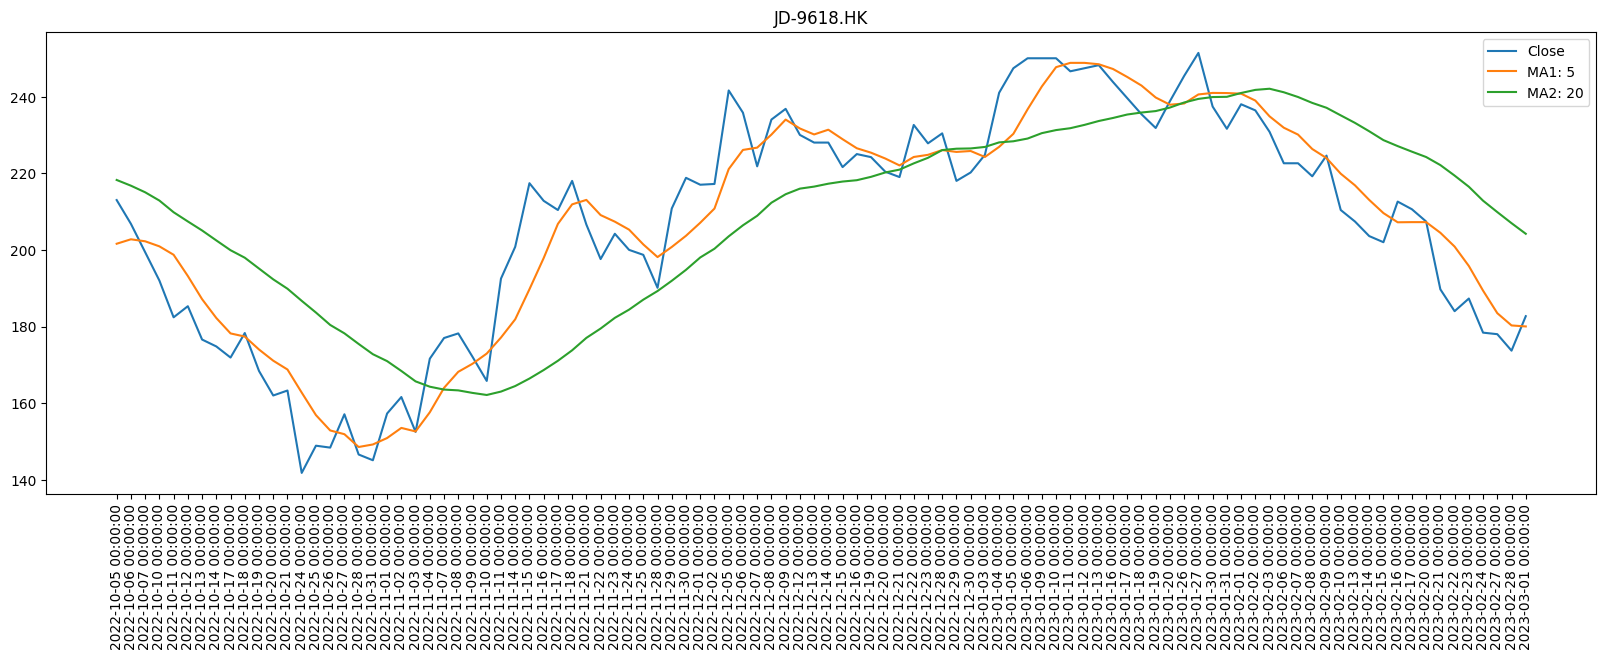

[*********************100%***********************]  1 of 1 completed


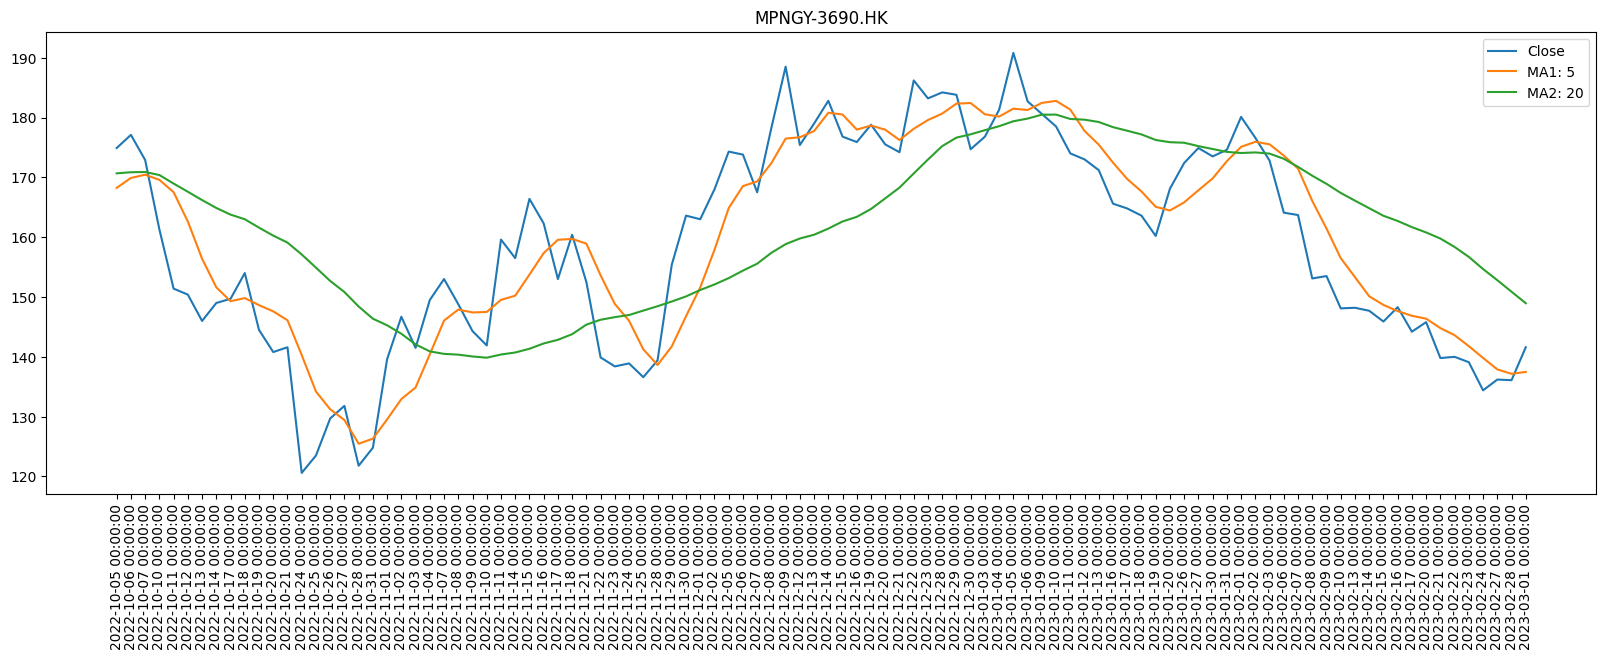

[*********************100%***********************]  1 of 1 completed


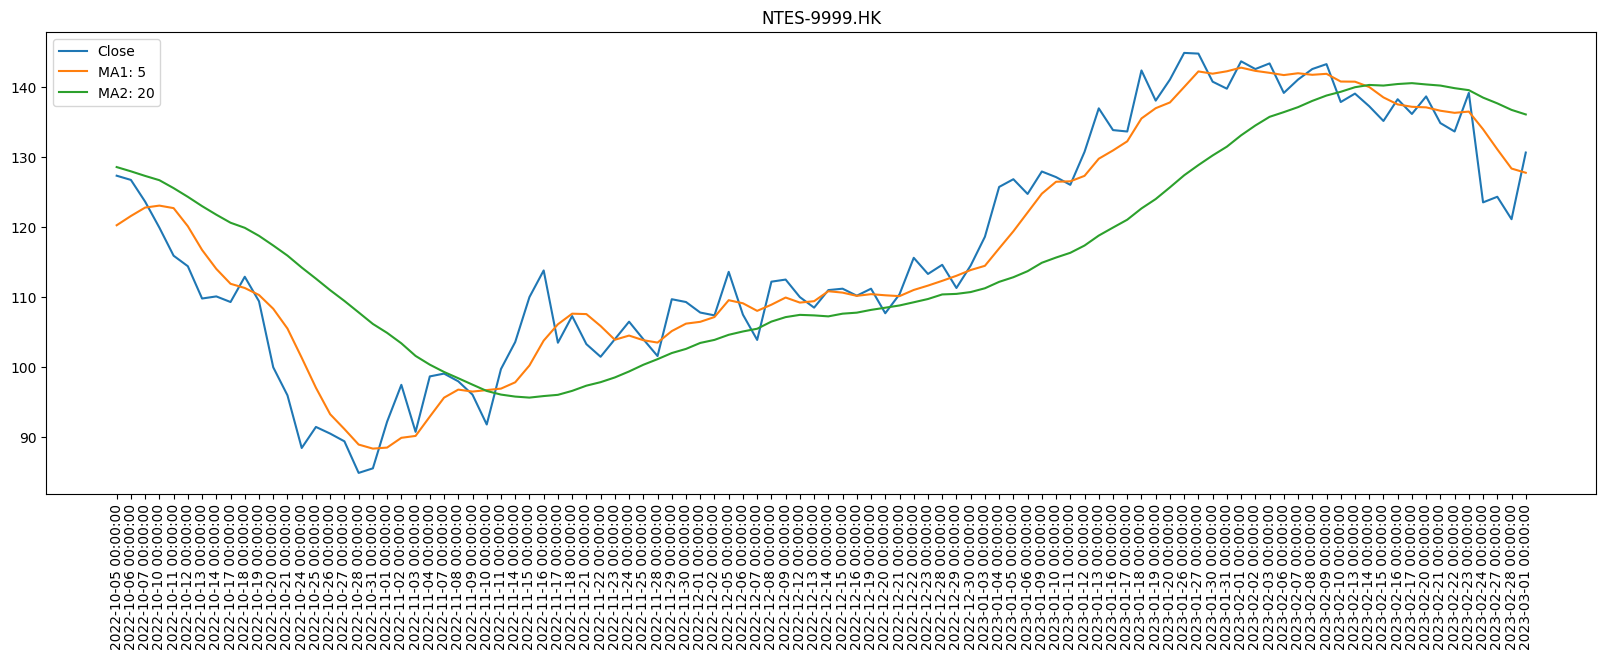

[*********************100%***********************]  1 of 1 completed


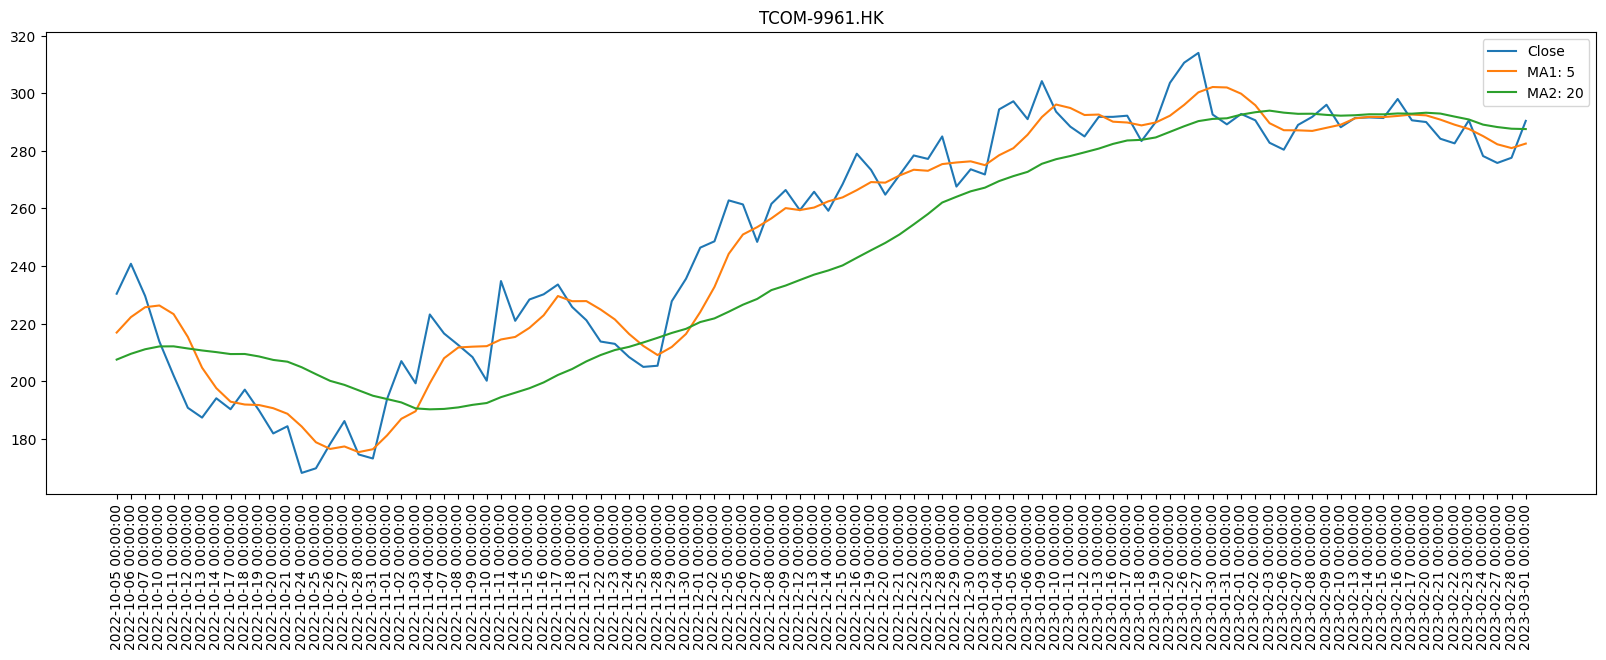

[*********************100%***********************]  1 of 1 completed


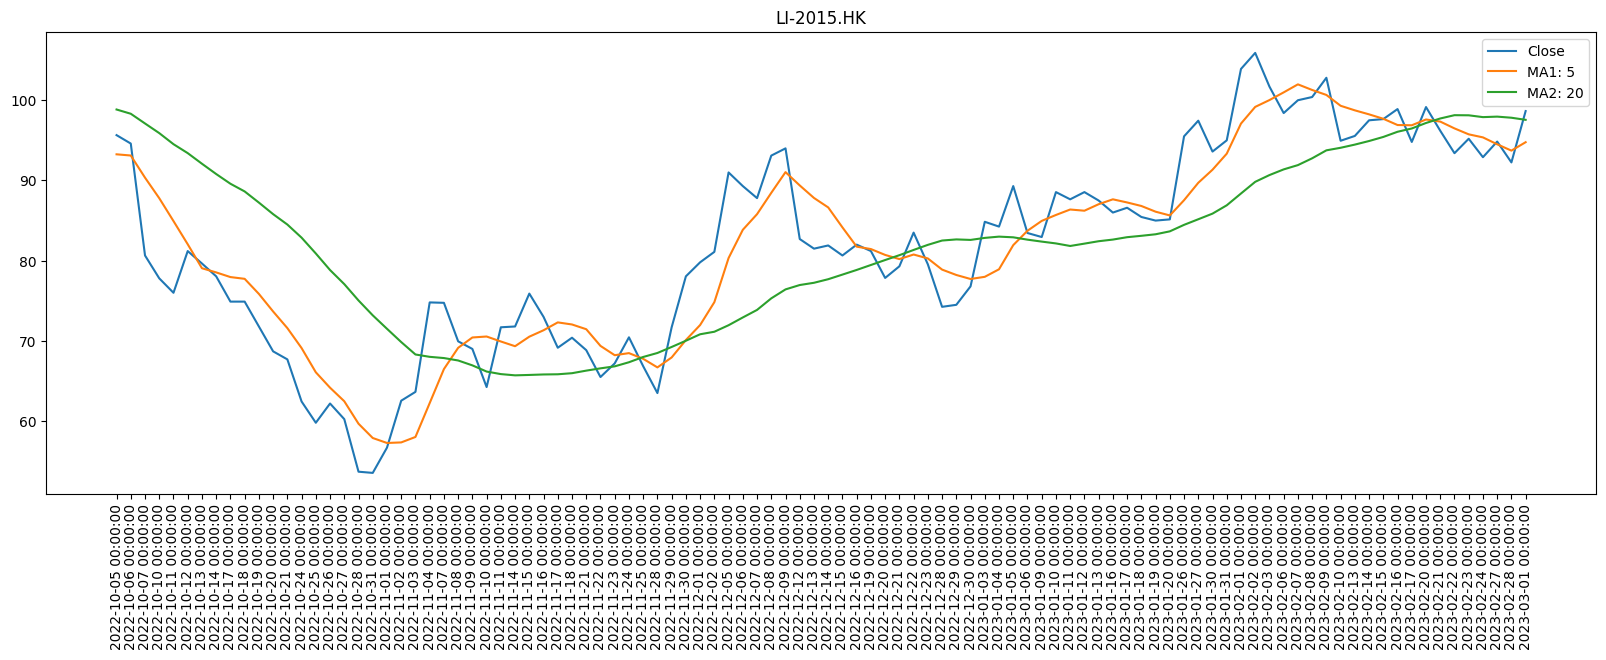

[*********************100%***********************]  1 of 1 completed


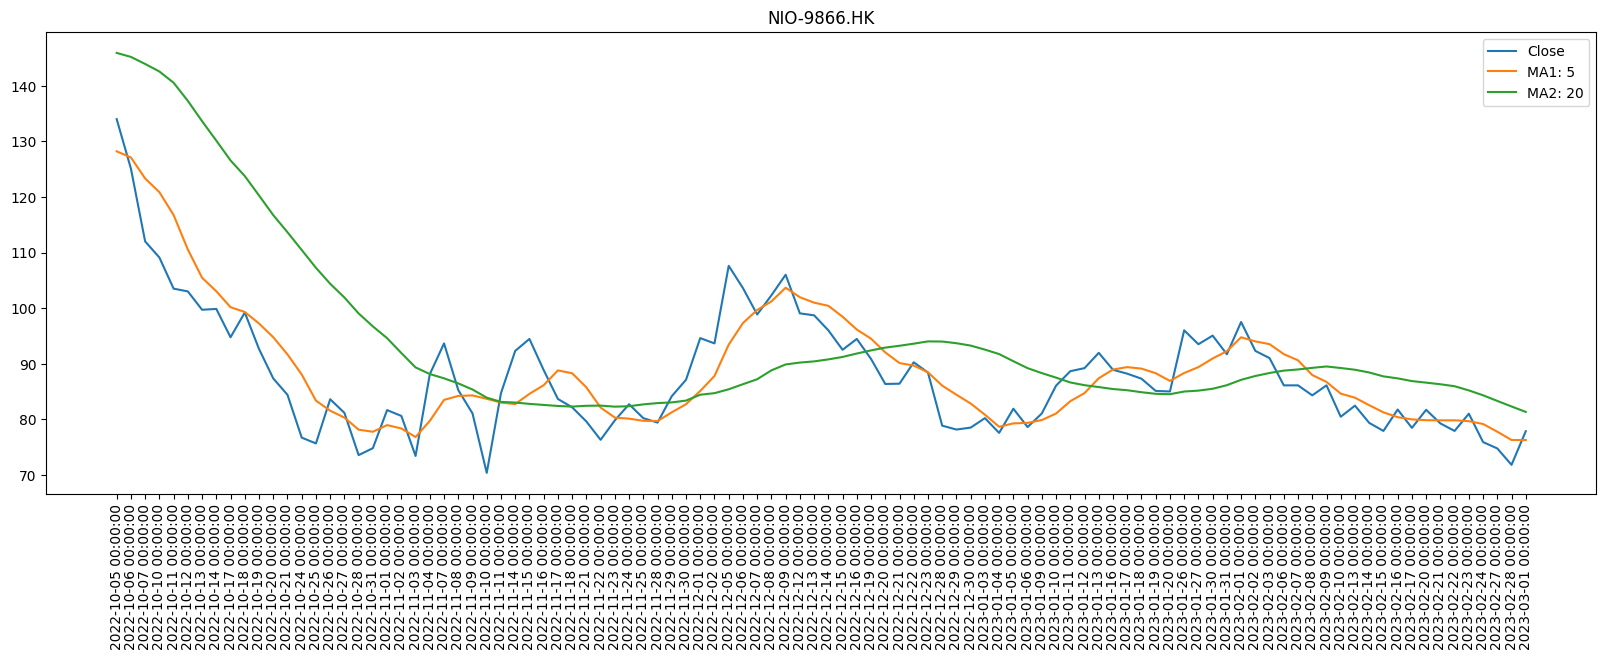

[*********************100%***********************]  1 of 1 completed


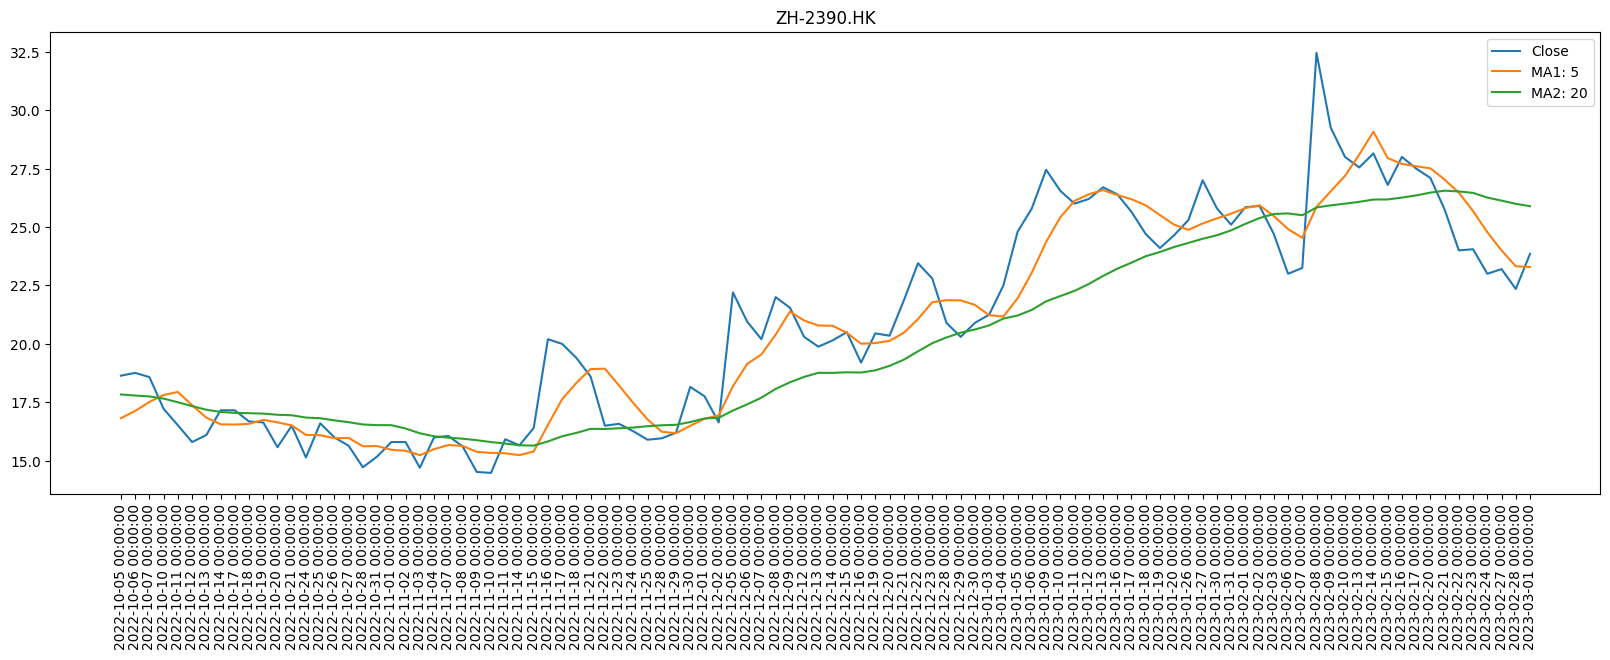

In [34]:
### trend by moving average
stocks_info = [
    ('BABA', '9988.HK', 87.79, 1),
    ('BIDU', '9888.HK', 137.69, 1),
    ('JD', '9618.HK', 44.44, 0.5 * 7.8),
    ('MPNGY', '3690.HK', 34.65, 0.5 * 7.8),
    ('NTES', '9999.HK', 77.64, 0.2 * 7.8),
    ('TCOM', '9961.HK', 35.55, 1 * 7.8),
    ('LI', '2015.HK', 23.61, 0.5 * 7.8),
    ('NIO', '9866.HK', 9.39, 1 * 7.8),
    ('ZH', '2390.HK', 1.43, 3 * 7.8)
]

for it in stocks_info[:]:
    st, et = "2021-02-01", "2023-03-31"
    stock_code = "9988.HK" # 0700.HK, 9988.HK， 9888.HK, 9618.HK, 3690.HK, 9999.HK, 9961.HK, 2015.HK, 9866.HK, 
    ref_code, stock_code, _, _ = it
    df_data1 = get_df_data(stock_code, st, et)

    day_num = 100
    trend_df = df_data1[-day_num:].copy()
    x_list, y_list = trend_df.index, trend_df['Close']
    x_list = list( range(len(y_list)) )
    x_label = list(trend_df.index)
    z_list1, z_list2 = trend_df['MA1'], trend_df['MA2']
    plt.figure(figsize=(20, 6))
    plt.plot(x_list, y_list , label="Close")  # Plot the chart
    plt.plot(x_list, z_list1 , label="MA1: 5")  # Plot the chart
    plt.plot(x_list, z_list2 , label="MA2: 20")  # Plot the chart
    plt.title(ref_code+"-"+stock_code)
    plt.xticks(x_list, x_label, rotation=90)
    plt.legend()
    plt.show()  # display

[*********************100%***********************]  1 of 1 completed


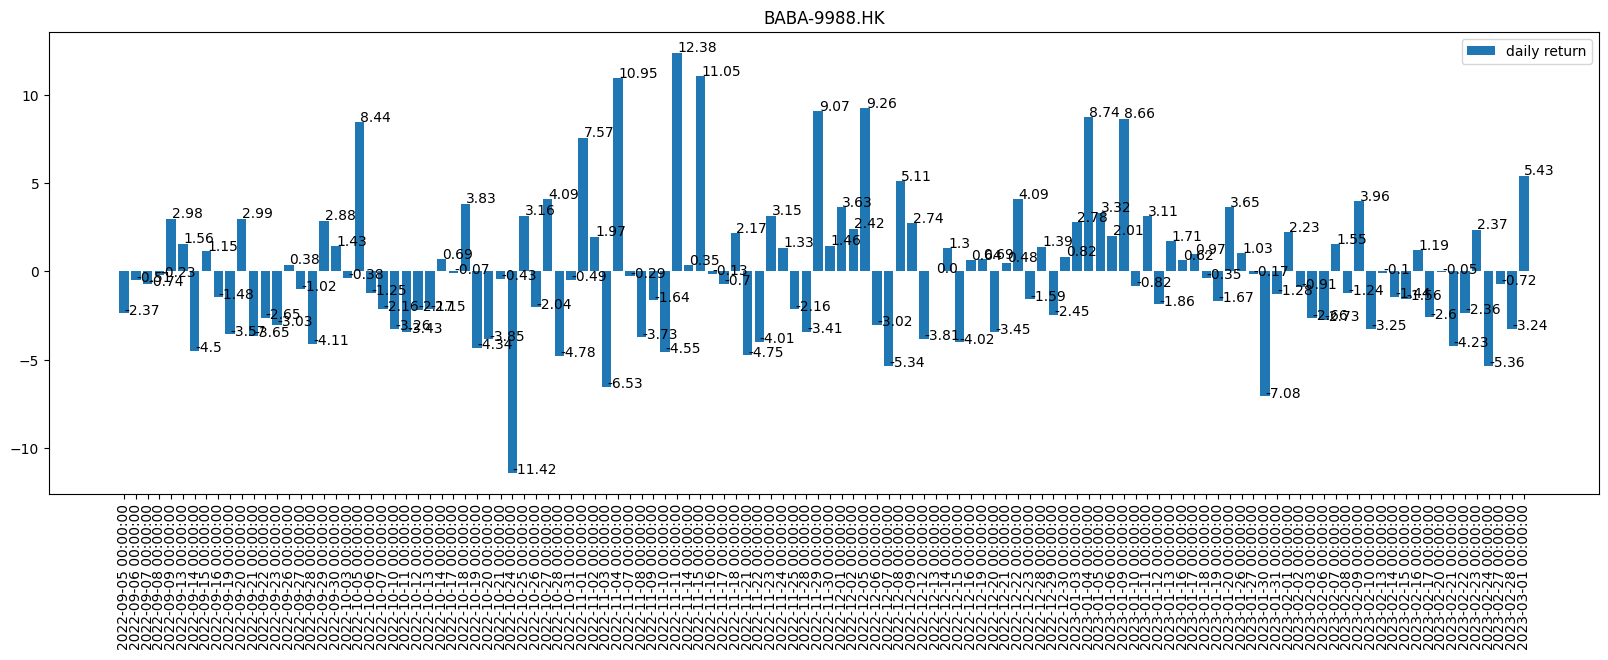

[*********************100%***********************]  1 of 1 completed


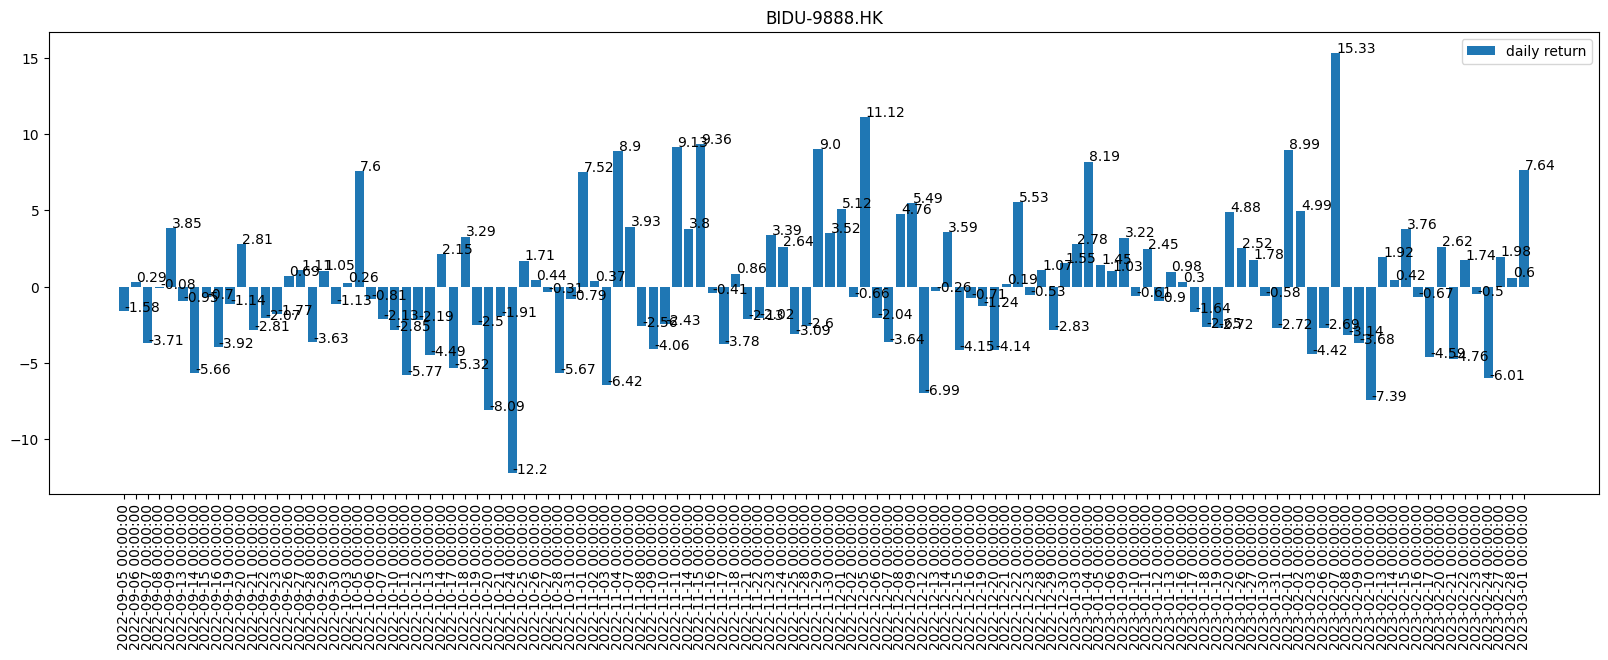

[*********************100%***********************]  1 of 1 completed


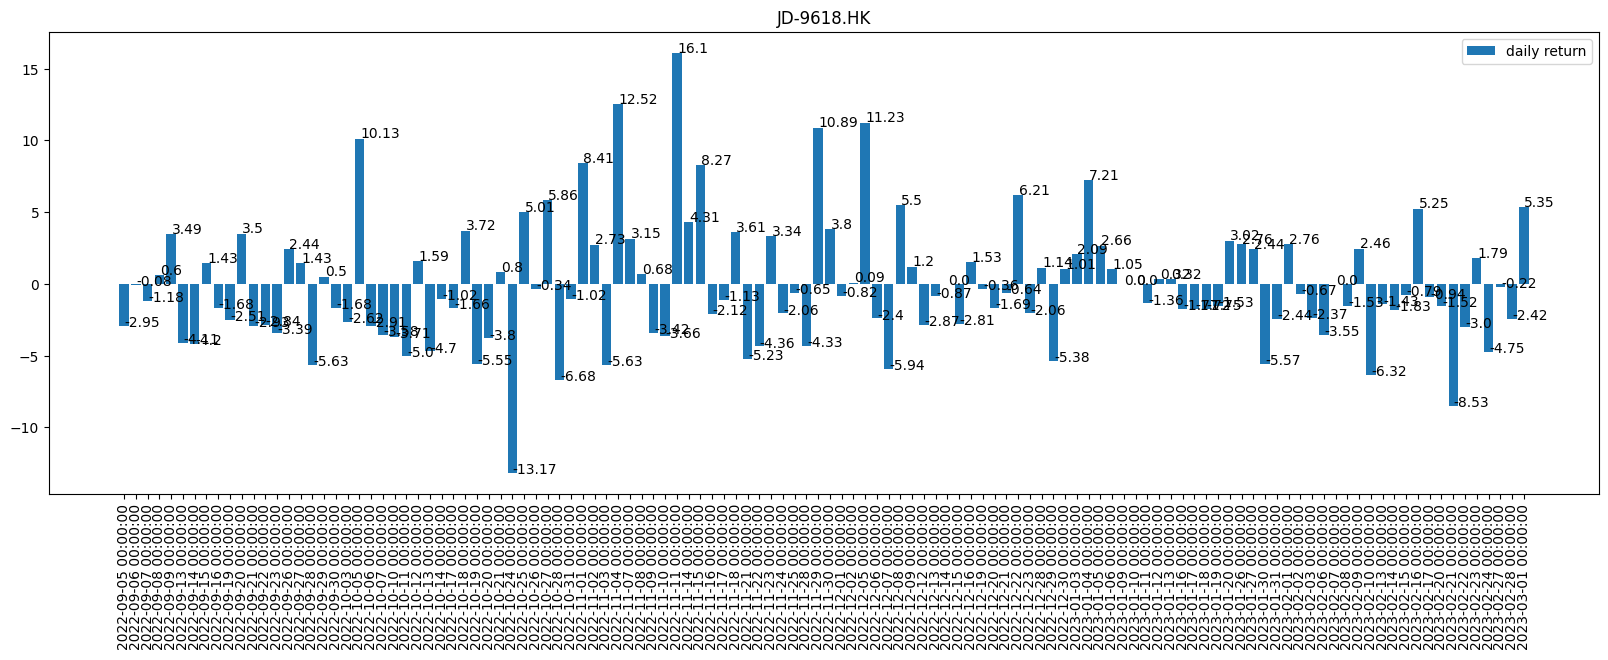

[*********************100%***********************]  1 of 1 completed


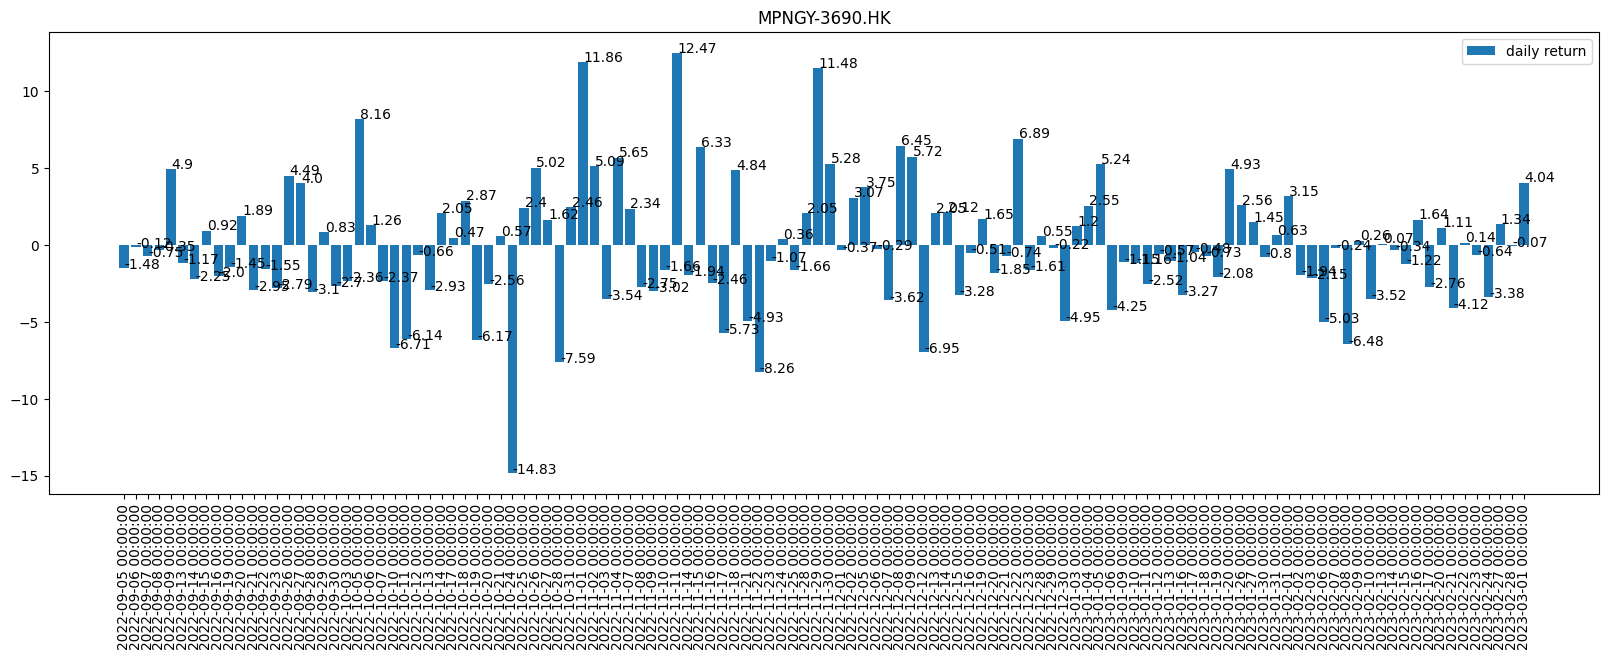

[*********************100%***********************]  1 of 1 completed


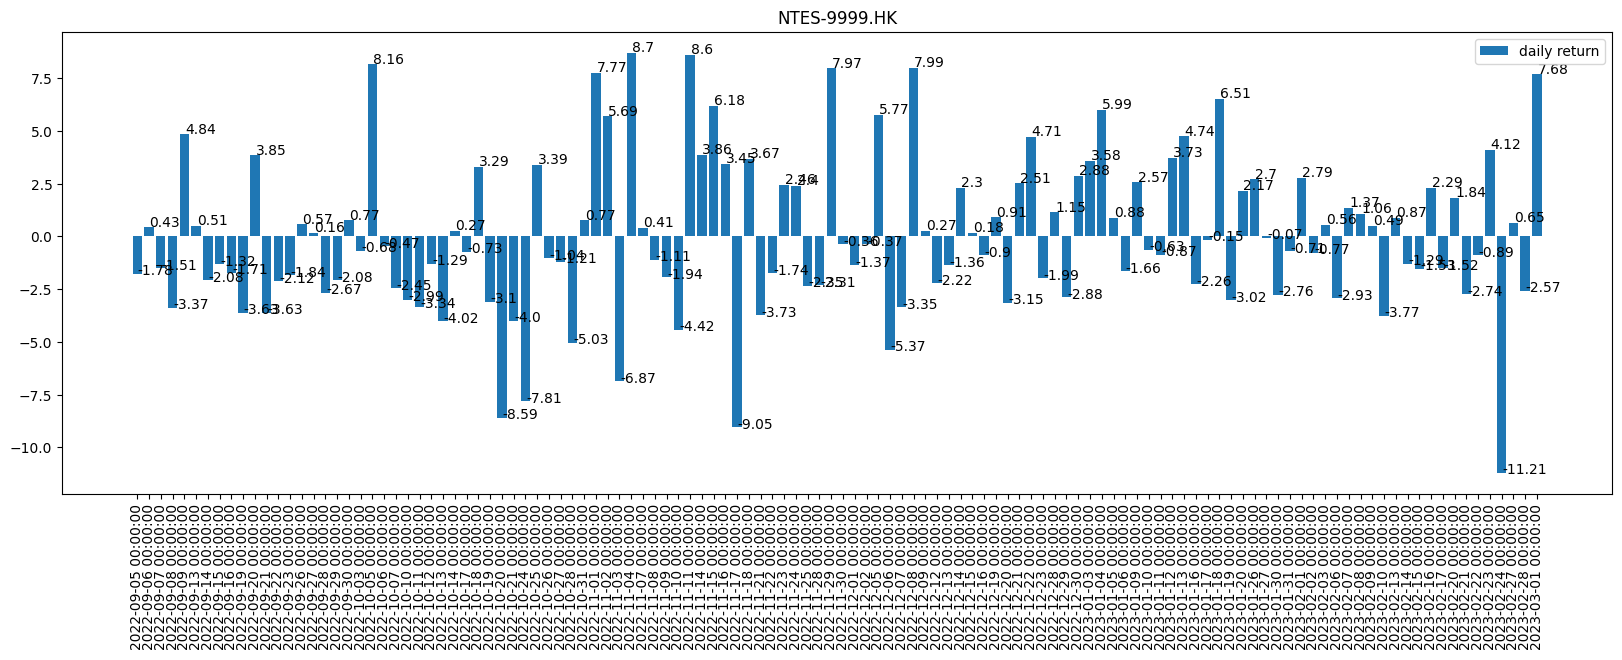

[*********************100%***********************]  1 of 1 completed


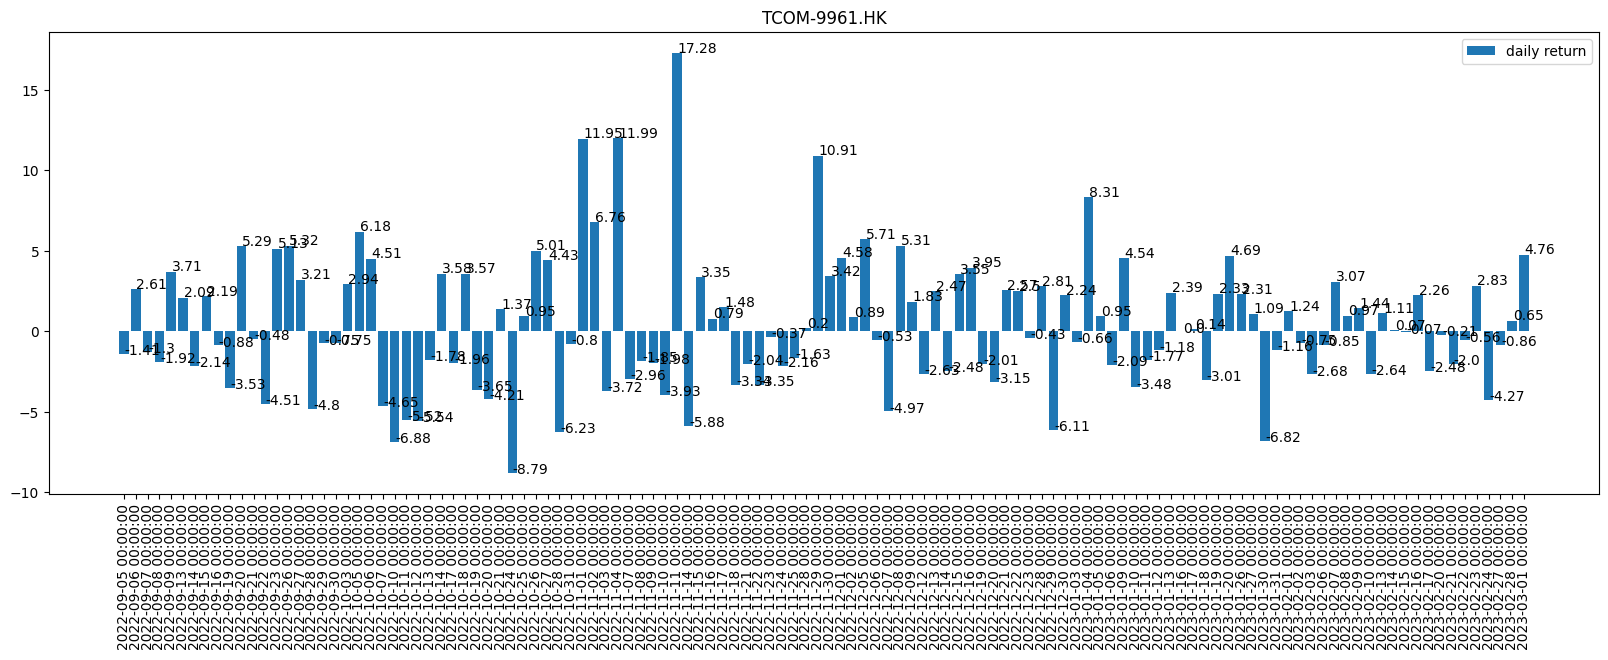

[*********************100%***********************]  1 of 1 completed


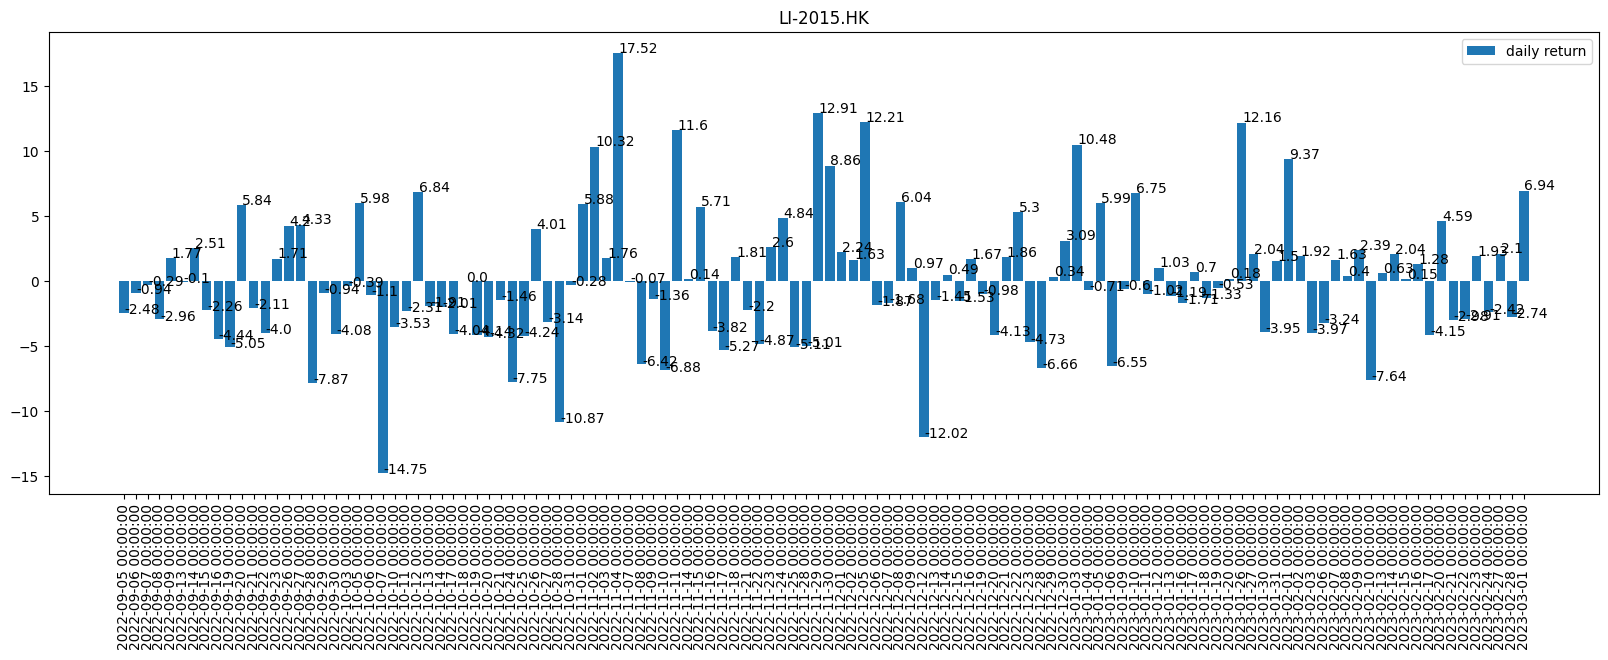

[*********************100%***********************]  1 of 1 completed


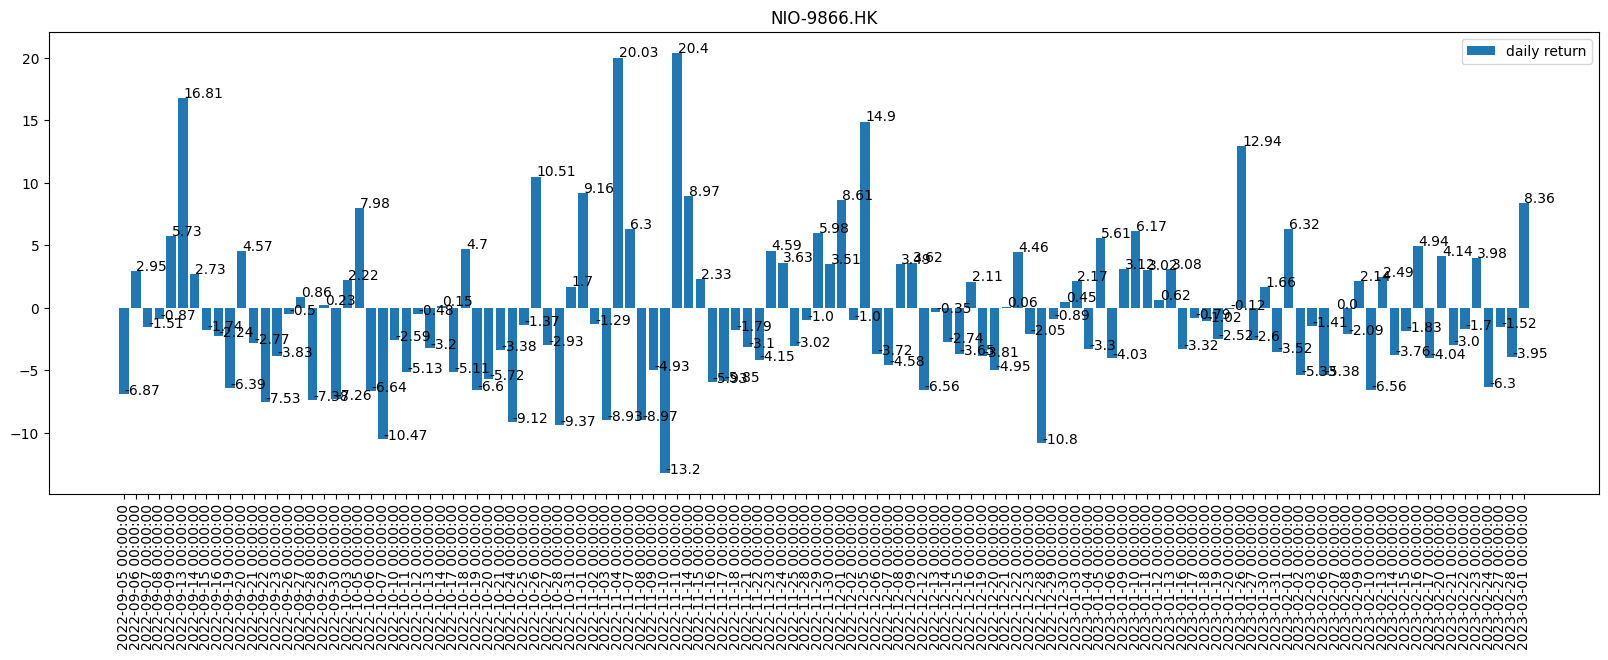

[*********************100%***********************]  1 of 1 completed


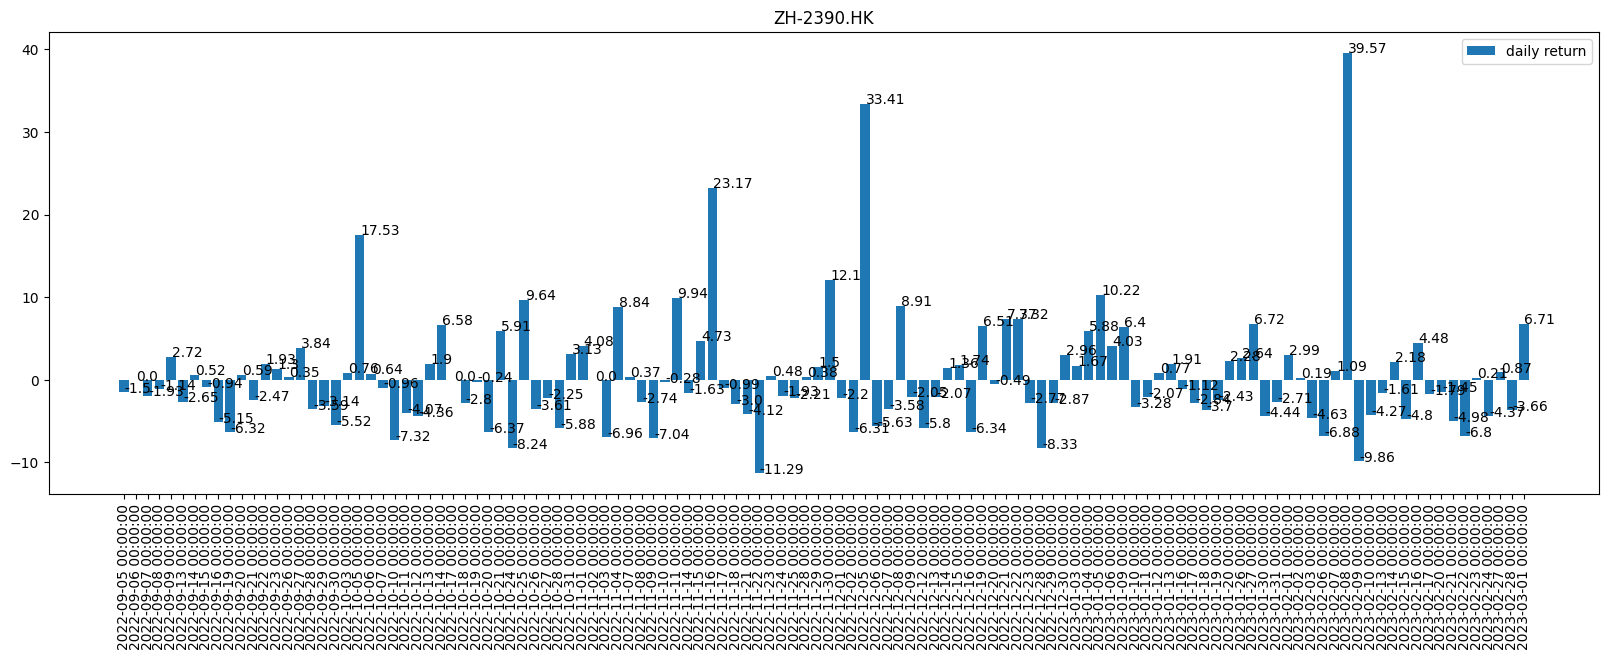

In [35]:
### daily returns
stocks_info = [
    ('BABA', '9988.HK', 87.79, 1),
    ('BIDU', '9888.HK', 137.69, 1),
    ('JD', '9618.HK', 44.44, 0.5 * 7.8),
    ('MPNGY', '3690.HK', 34.65, 0.5 * 7.8),
    ('NTES', '9999.HK', 77.64, 0.2 * 7.8),
    ('TCOM', '9961.HK', 35.55, 1 * 7.8),
    ('LI', '2015.HK', 23.61, 0.5 * 7.8),
    ('NIO', '9866.HK', 9.39, 1 * 7.8),
    ('ZH', '2390.HK', 1.43, 3 * 7.8)
]

for it in stocks_info[:]:
    st, et = "2021-02-01", "2023-03-31"
    stock_code = "9988.HK" # 0700.HK, 9988.HK， 9888.HK, 9618.HK, 3690.HK, 9999.HK, 9961.HK, 2015.HK, 9866.HK, 
    ref_code, stock_code, _, _ = it
    df_data1 = get_df_data(stock_code, st, et)

    day_num = 120
    daily_df = df_data1[-day_num:].copy()
    daily_df['daily_return'] = daily_df['daily_return']*100
    daily_df['daily_return'] = daily_df['daily_return'].round(2)
    x_list, y_list = list(daily_df.index), list(daily_df['daily_return'])
    x_list = list( range(len(y_list)) )
    x_label = list(daily_df.index)
    plt.figure(figsize=(20, 6))
    plt.bar(x_list, y_list , label="daily return")  # Plot the chart
    addlabels(x_list, y_list, 0.05, 0.05)
    plt.title(ref_code+"-"+stock_code)
    plt.xticks(x_list, x_label, rotation=90)
    plt.legend()
    plt.show()  # display
    

[*********************100%***********************]  1 of 1 completed


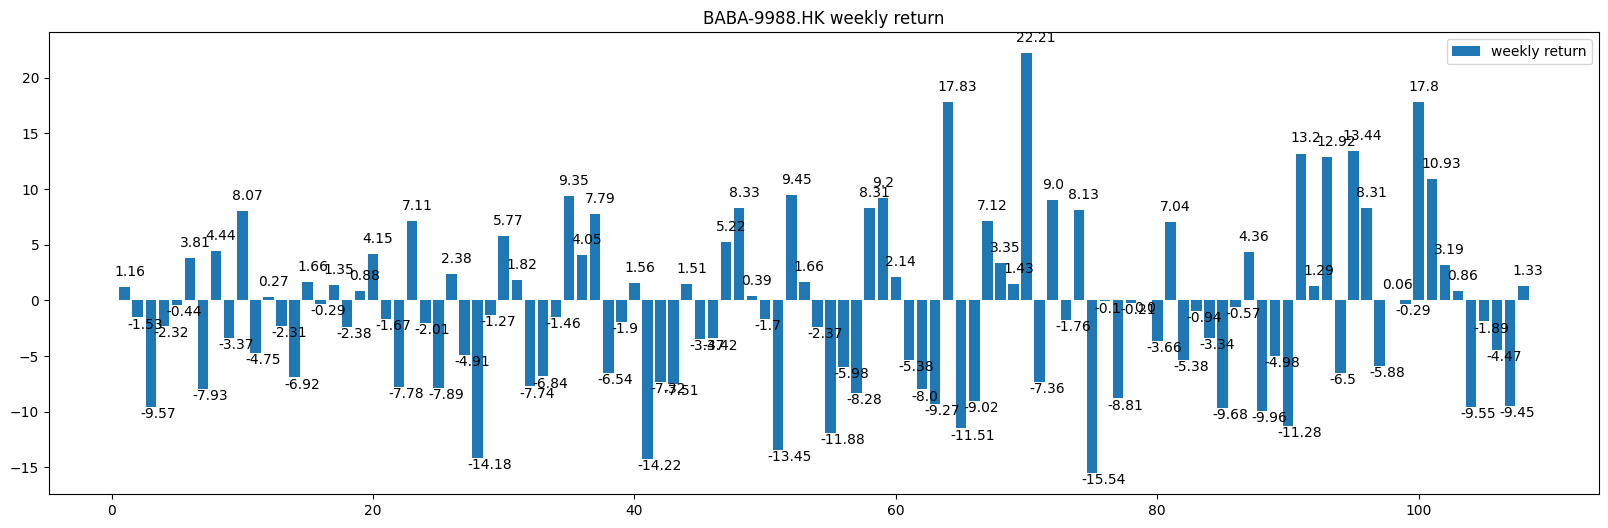

[*********************100%***********************]  1 of 1 completed


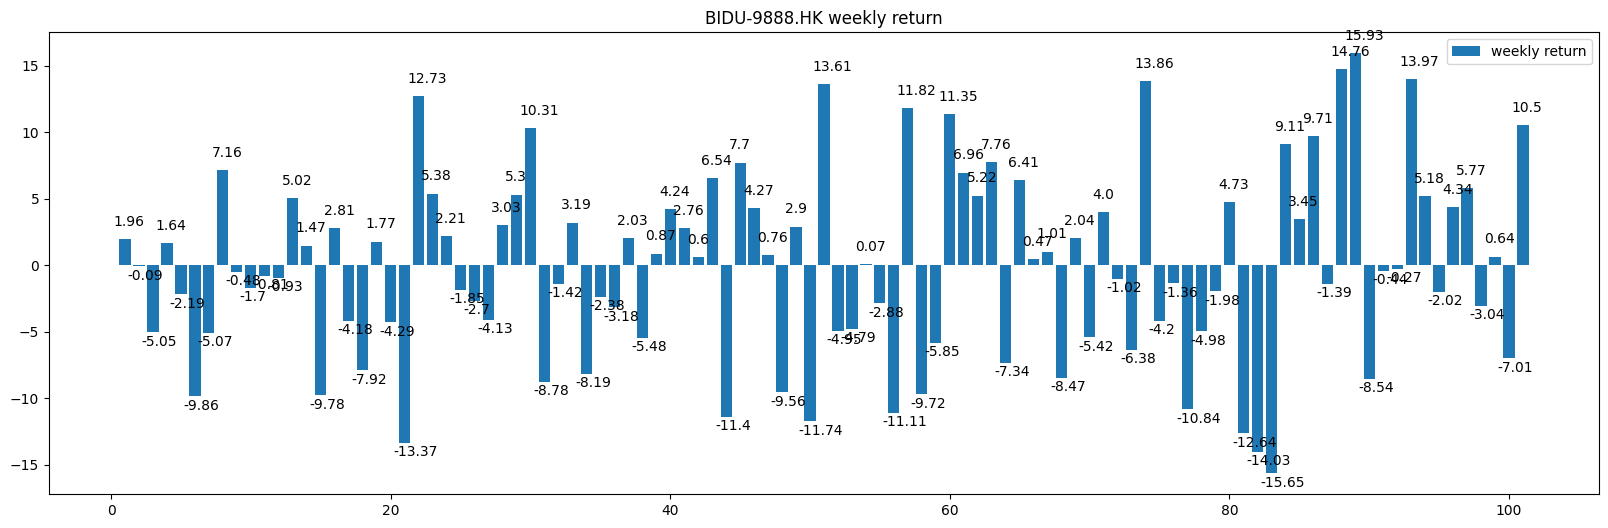

[*********************100%***********************]  1 of 1 completed


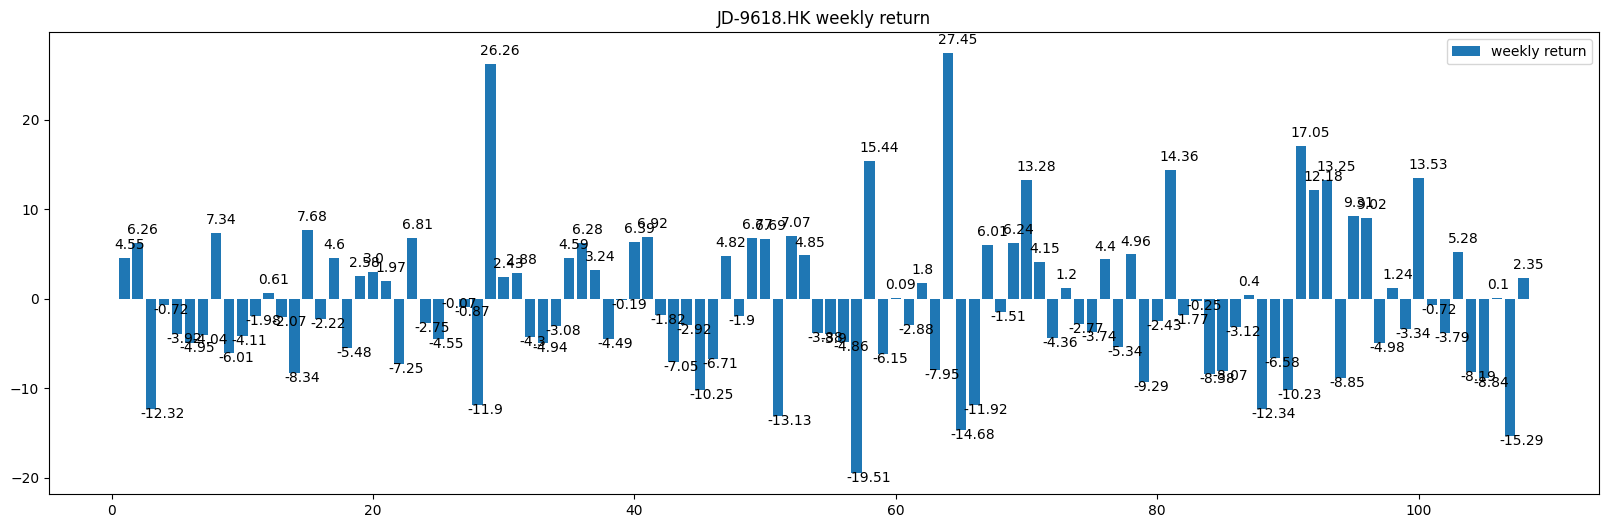

[*********************100%***********************]  1 of 1 completed


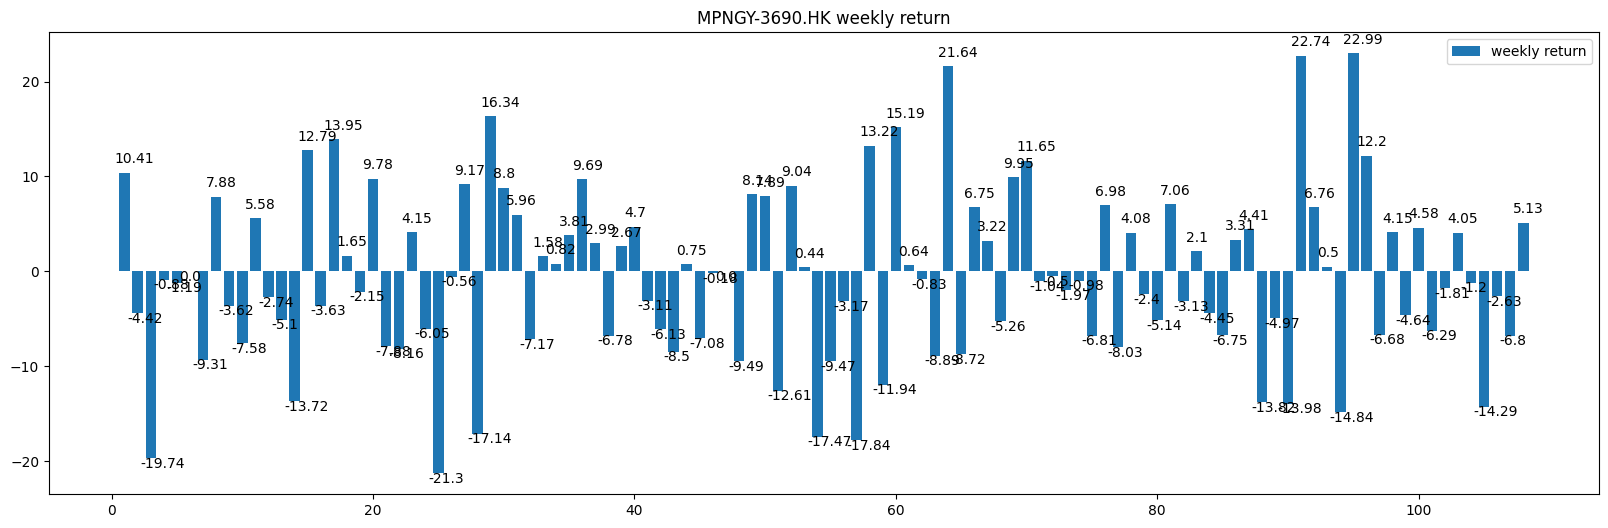

[*********************100%***********************]  1 of 1 completed


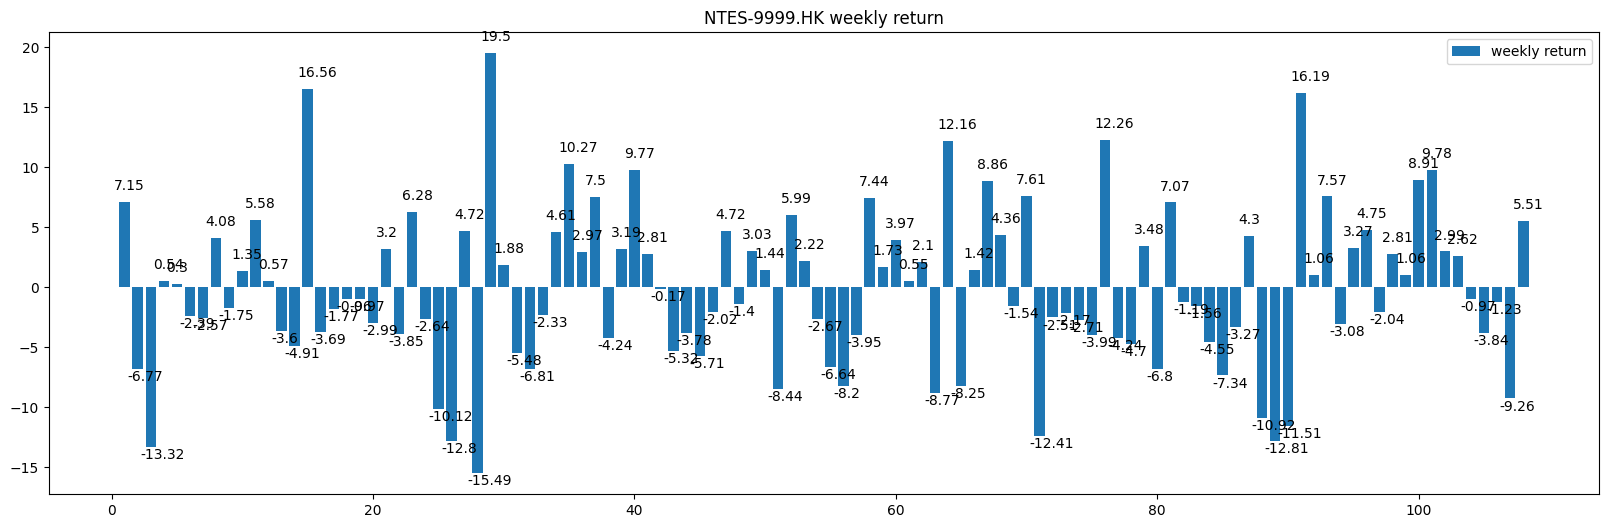

[*********************100%***********************]  1 of 1 completed


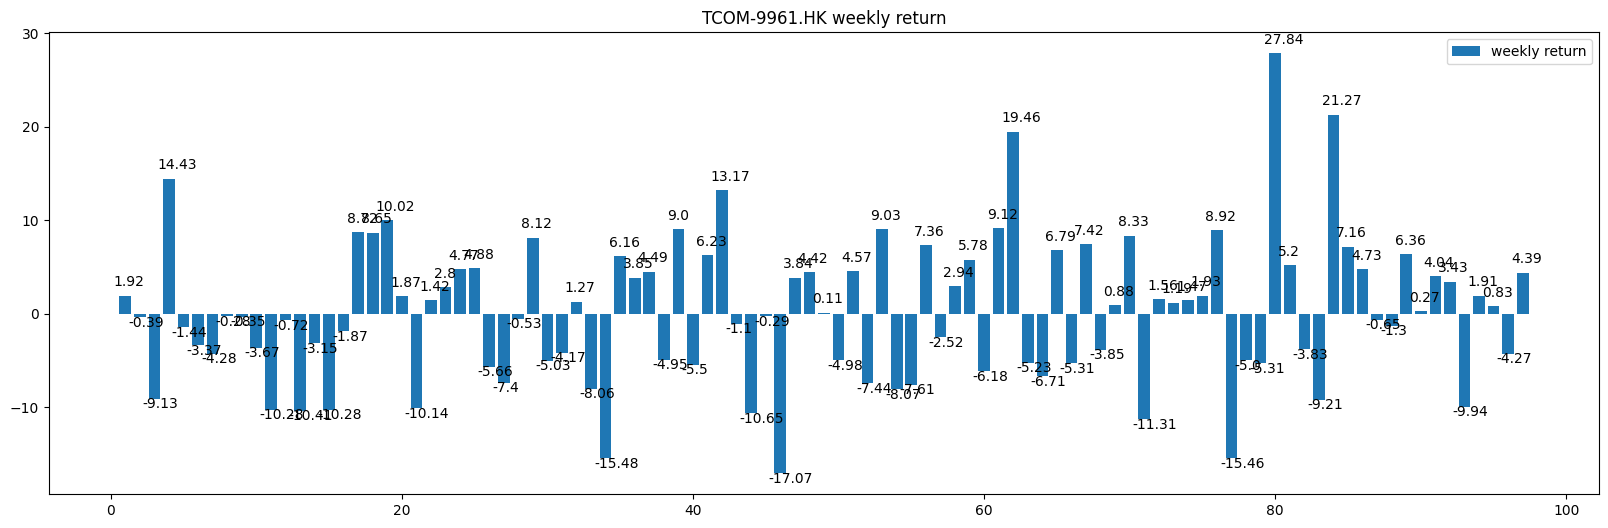

[*********************100%***********************]  1 of 1 completed


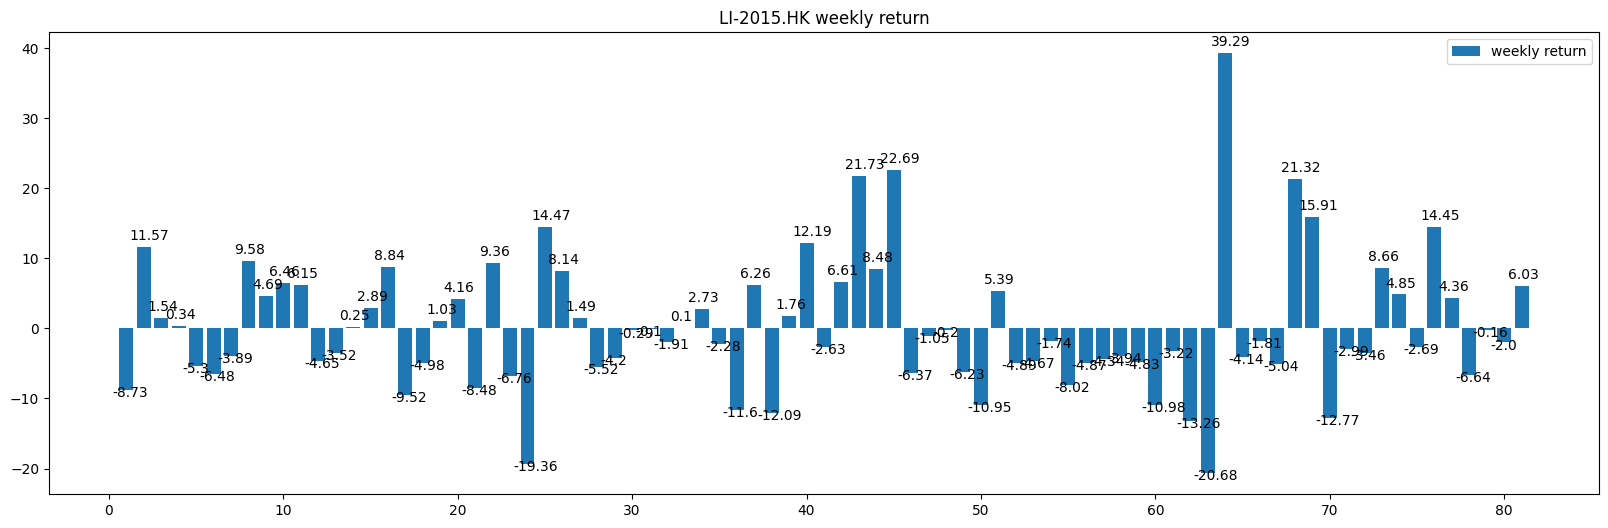

[*********************100%***********************]  1 of 1 completed


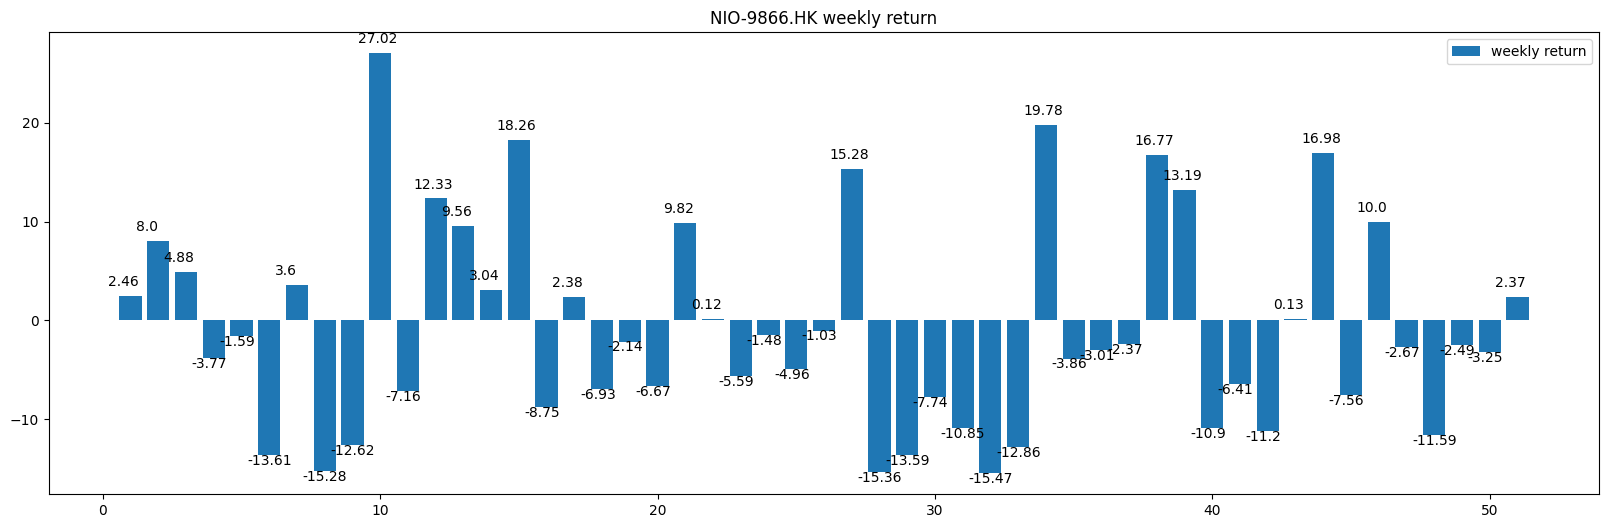

[*********************100%***********************]  1 of 1 completed


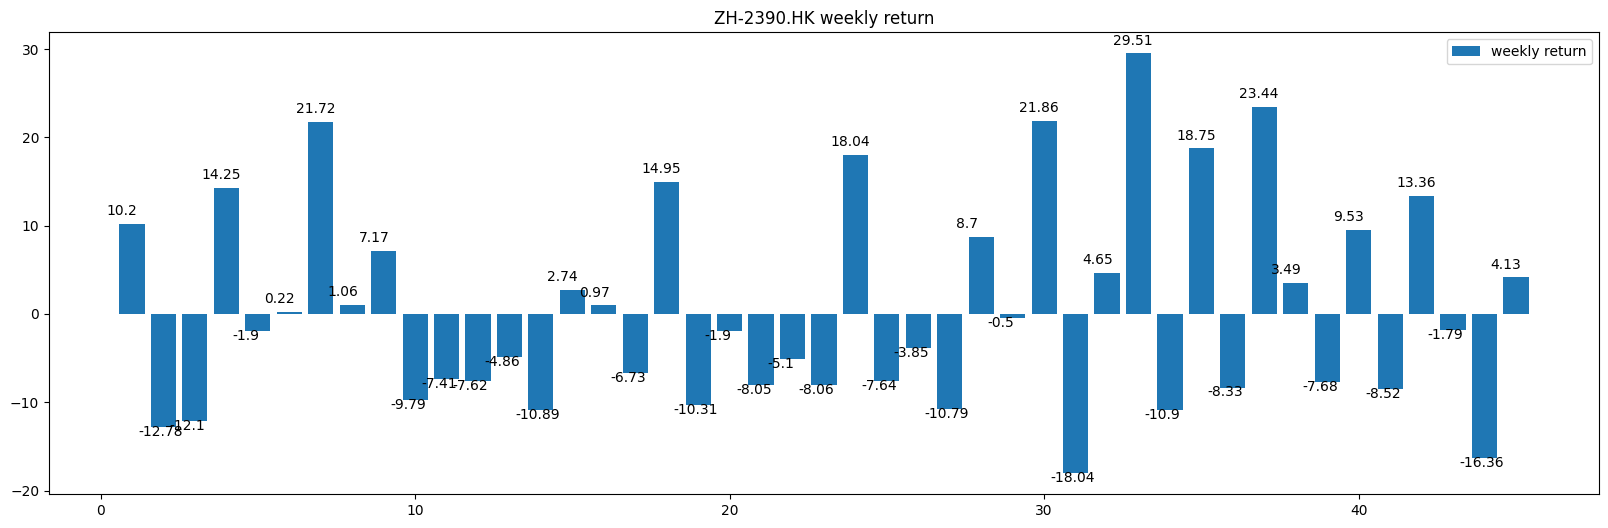

In [36]:
### weekly return
stocks_info = [
    ('BABA', '9988.HK', 87.79, 1),
    ('BIDU', '9888.HK', 137.69, 1),
    ('JD', '9618.HK', 44.44, 0.5 * 7.8),
    ('MPNGY', '3690.HK', 34.65, 0.5 * 7.8),
    ('NTES', '9999.HK', 77.64, 0.2 * 7.8),
    ('TCOM', '9961.HK', 35.55, 1 * 7.8),
    ('LI', '2015.HK', 23.61, 0.5 * 7.8),
    ('NIO', '9866.HK', 9.39, 1 * 7.8),
    ('ZH', '2390.HK', 1.43, 3 * 7.8)
]

for it in stocks_info[:]:
    st, et = "2021-02-01", "2023-03-31"
    stock_code = "9988.HK" # 0700.HK, 9988.HK， 9888.HK, 9618.HK, 3690.HK, 9999.HK, 9961.HK, 2015.HK, 9866.HK, 
    ref_code, stock_code, _, _ = it
    df_data1 = get_df_data(stock_code, st, et)
    x_list, y_list = [], []
    for wn in range(1, max(df_data1['week_num'])+1):
        r = weekly_return2(df_data1, wn)
        x_list.append(wn)
        y_list.append(r)

    plt.figure(figsize=(20, 6))
    plt.bar(x_list, y_list , label="weekly return")  # Plot the chart
    addlabels(x_list, y_list, -0.8, 1)
    plt.title(ref_code+"-"+stock_code + " weekly return")
    plt.legend()
    plt.show()  # display